In [1]:
# This ipynb notebook entails the findings for the presentation in slide number 6 based on 
# variable factors. These factors include number of reviews, social networking,
# total box office revenues, etc. For instance, I used the following EDA algorithms such as 
# Ridge Regression, Knn, Bayesian Regression, and Decision Tree Regression to
# present to Microsoft's, CEO on what types of film genres to produce. 

# The above EDA provide answers to the CEO of Microsoft to the following questions on various 
# decision-making strategies for the newly launched Microsoft Movie Studio: 
# How do national and global box office revenue provide decision-making for creating movies?
# What externalities in society would conclude the findings on the genres movie goers like the most? 
# How does the variables in the data provide an answer to what movies to produce?

# The data was collected through IMDB from grouplens' movielens website which gathers data on 
# movie ratings from other sites such as theBoxOfficeMojo, Rotten Tomatoes, TheMovieDB.org, etc.

# I used Numpy, Pandas, Matplotlib, Seaborn, and sklearn libraries for the in slide 6 of
# the Powerpoint Presentation. 

# Step 1: Importing the necessary libraries

# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold

# Step 2: Loading the dataset into Pandas Dataframe

# Load the CSV file to a Pandas Dataframe

dataset = pd.read_csv("movie_metadata.csv")

# Step 3: Extracting non-object elements

X_data=dataset.dtypes[dataset.dtypes!='object'].index
X_train=dataset[X_data]
X_train.head()[:2]


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0


In [2]:
# Step 4: Filling out all Null Values

X = X_train.fillna(0)
y=X['imdb_score']
X.drop(['imdb_score'],axis=1,inplace=True)

In [3]:
X  = X.values
y  = y.values

In [4]:
# Step 5: Filling all Null values again
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['imdb_score']
X_train.drop(['imdb_score'],axis=1,inplace=True)
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


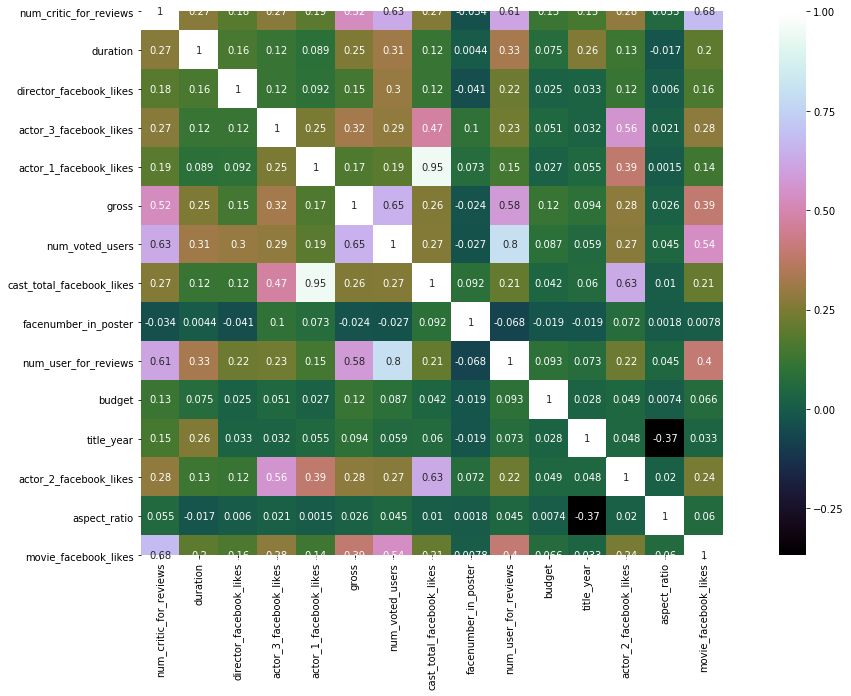

In [5]:
# Step 6: GETTING Correllation matrix - Pandas was used for this step from the url: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html and 
# for Pearson's Coefficient Correlation I gathered data from this url: 
# https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

# I used the Pearson's Coefficient Correlation method which is the test statistics that measures the 
# statistical relationship, or association, between two continuous variables.  
# It is known as the best method of measuring the association between variables of interest 
# because it is based on the method of covariance.  It gives information about the magnitude of 
# the association, or correlation, as well as the direction of the relationship.

# The value of the correlation coefficient varies between +1 and -1.  
# A value of ± 1 indicates a perfect degree of association between the two variables.  
# As the correlation coefficient value goes towards 0, the relationship between the two variables 
#  will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; 
# a + sign indicates a positive relationship and a – sign indicates a negative relationship.

# measure the degree of the relationship between linearly related variables. 
# For example, in the stock market, if we want to measure how two stocks are related to each other, 
# Pearson r correlation is used to measure the degree of relationship between the two. 
# The point-biserial correlation is conducted with the Pearson correlation formula except that 
# one of the variables is dichotomous. The following formula is used to calculate 
# the Pearson r correlation:

# rxy = Pearson r correlation coefficient between x and y
# n = number of observations
# xi = value of x (for ith observation)
# yi = value of y (for ith observation)

corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [6]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

In [7]:
%%html
<font size=6 color='black'>Principal Component Analysis (PCA) Algorithm</font>

Text(0, 0.5, 'Cumulative explained variance')

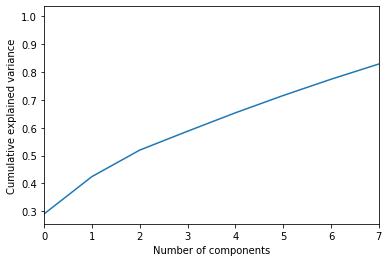

In [8]:
# Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to
# reduce a large set of variables to a small set that still contains most of the information in
# the large set.

# Principal component analysis (PCA) is a mathematical procedure that transforms a number of (possibly)
# correlated variables into a (smaller) number of uncorrelated variables called principal components. 

# The first principal component accounts for as much of the variability in the data as possible, and each
# succeeding component accounts for as much of the remaining variability as possible.

# Principal components analysis is similar to another multivariate procedure called Factor Analysis. 
# They are often confused and many scientists do not understand the difference between the two methods
# or what types of analyses they are each best suited.

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # explained_variance_ratio_array, shape (n_components,)
# Percentage of variance explained by each of the selected components. 

# Furthermore, the variance ratio is based upon Sir RA Fisher, the great statistician of 
# the twentieth century, introduced the term “variance” in 1920 for the analysis of statistical data. 
# The technique for the analysis of variance of two or more samples was developed by Fisher himself. 
# The “variance-ratio test” is also known as “F-ratio test” or F-test. 
# The F-test demonstrates that whether the variance of two populations from which the samples 
# have been drawn is equal or not, whereas the 
# “analysis of variance” ascertains the difference of variance among more than two samples.
# Source: https://link.springer.com/chapter/10.1007/978-981-13-0827-7_12

plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Since 5 components can explain more than 70% of the variance, we choose the number of the 
# components to be 5

# Data collected from this url: file:///C:/Users/Munbew1/Downloads/AtchleyOct19.pdf
# On top of that I used scikit learn PCA library from this url: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html and 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

(-2, 2)

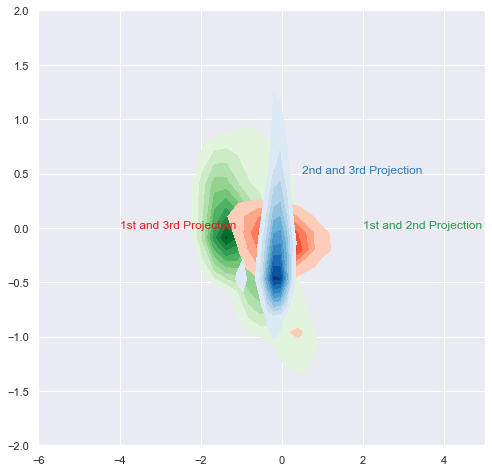

In [9]:
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [10]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)

In [11]:
%%html
<font size=6 color='black'>Bayesian Regression Algorithm</font>

In [12]:
# In this section by using the Bayesian Ridge Regression Statistical Model, I have delved into the
# the crux of the dataset to further perform an in-depth analysis through EDA. In addition,
# Bayesian regression can be implemented by using regularization parameters in estimation. 
# The BayesianRidge estimator applies Ridge regression and its coefficients to find out 
# a posteriori estimation under the Gaussian distribution.

# # sklearn's Bayesian Ridge Regression model was retrieved from this site:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

# Statistical mathematics used were based on BayesianRidge estimates a probabilistic model of 
# the regression problem as described above. The prior for the coefficient 
# is given by a spherical Gaussian distribution.

# The priors over alpha_init and lambda_init are chosen to be gamma distributions, 
# the conjugate prior for the precision of the Gaussian. 
# The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge.
# The parameters coefficient w, alpha, and lambda are estimated jointly during the fit of the model, 
# the regularization parameters alpha_init and lambda_init being estimated by maximizing 
# the log marginal likelihood. The initial value of the maximization procedure can be set 
# with the hyperparameters alpha_init and lambda_init.

# The Bayesian Ridge Regression Algorithm defines the model with default parameters and 
# fit it with train data.

reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

# We can check the model score that is R-squared metrics in which 
# R-squared is a statistical measure that represents the proportion of the variance for 
# a dependent variable that's explained by an independent variable or variables in a regression model.

score_bay= reg.score(x_test,y_test)
print('Variance score: %.2f' % score_bay)

# This part makes predictions on the test data and check the accuracy level.

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Variance score: 0.09
Train error = 13.917498224550107 percent in Bayesian Regression
Test error = 0.025299116548973162 percent in Bayesian Regression


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

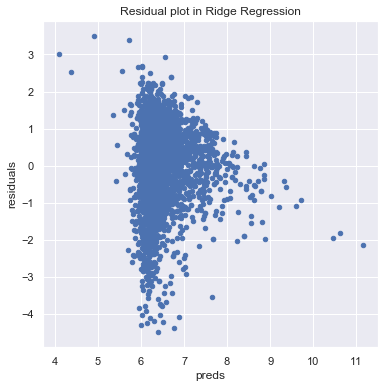

In [13]:
# Here a I createed a scatter plot to visualize the result and original data. I used Matplotlib's API from
# this url: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html. This includes Pandas and 
# sklearn to make predictions on the relevant dataset used.

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

In [14]:
%%html
<font size=6 color='black'>Decision Tree Regressor</font>

In [15]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# It breaks down a dataset into smaller and smaller subsets while at the same time an 
# associated decision tree is incrementally developed.dec = tree.DecisionTreeRegressor(max_depth=1)

# Standard deviation and Coefficient of Variation statistical math were used to build this 
# Decision Tree Reressor algorithm.
# Also, predictions on the classification and regression were calculated along with the 
# return for the coefficient of determination R^2 of the prediction

# sklearn's API DecisionTreeRegressor was used from this url: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)
score_tree= dec.score(x_test,Y_test)
print('Variance score: %.2f' % score_tree)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Variance score: 0.22
Train error = 14.590941891509965 percent in Decision Tree Regressor
Test error = 5.8166500873518645 percent in Decision Tree Regressor


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Residual plot in Decision Tree')

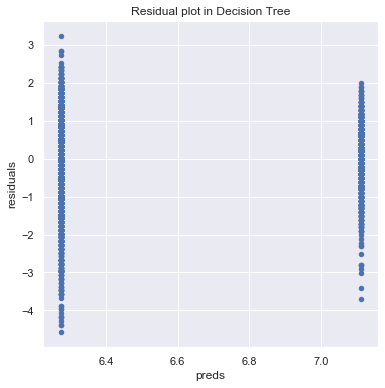

In [16]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")